In [ ]:
# Urban Noise Pollution Analysis 
# Noise pollution is a significant yet often under-appreciated environmental issue in urban areas, with 
# potential impacts on health, sleep quality, hearing, and overall quality of life. Your task is to analyse 
# urban noise data to identify where, when, and how noise levels vary in city environments. The goal is 
# to discover patterns, hotspots, and temporal trends in noise exposure, and provide actionable 
# insights for urban planners, policy makers, or citizen awareness.


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
noise = pd.read_csv('urban_noise_levels.csv')
print(noise.shape)
print(noise.head())

(2000, 26)
   id   latitude  longitude             datetime  decibel_level  hour  \
0   1  40.649816 -74.069147  2023-04-01 18:50:00      78.286408    18   
1   2  40.880286 -74.076511  2023-03-18 04:12:00      68.131845     4   
2   3  40.792798 -73.746873  2023-12-03 05:43:00      58.934966     5   
3   4  40.739463 -74.075227  2023-06-20 00:44:00      69.559042     0   
4   5  40.562407 -74.064025  2023-12-28 12:06:00      60.409097    12   

   day_of_week  is_weekend  temperature_c  humidity_%  ...  \
0            5           1      16.710979   43.054747  ...   
1            5           1      10.088749   29.676246  ...   
2            6           1      19.911075   47.932832  ...   
3            1           0       3.477520   88.594010  ...   
4            3           0      17.356303   35.811699  ...   

   population_density  park_proximity  industrial_zone  vehicle_count  \
0               28384               0                0             24   
1               24206          

In [51]:
print(noise.describe(include='all'))

                 id     latitude    longitude             datetime  \
count   2000.000000  2000.000000  2000.000000                 2000   
unique          NaN          NaN          NaN                 1998   
top             NaN          NaN          NaN  2023-04-21 03:39:00   
freq            NaN          NaN          NaN                    2   
mean    1000.500000    40.699455   -73.951805                  NaN   
std      577.494589     0.116884     0.144290                  NaN   
min        1.000000    40.501287   -74.199994                  NaN   
25%      500.750000    40.595219   -74.074607                  NaN   
50%     1000.500000    40.702941   -73.953653                  NaN   
75%     1500.250000    40.800272   -73.825655                  NaN   
max     2000.000000    40.899887   -73.700221                  NaN   

        decibel_level         hour  day_of_week   is_weekend  temperature_c  \
count     2000.000000  2000.000000  2000.000000  2000.000000    2000.000000   
u

In [53]:
print('Missing Value: ')
print(noise.isna().sum())

Missing Value: 
id                    0
latitude              0
longitude             0
datetime              0
decibel_level         0
hour                  0
day_of_week           0
is_weekend            0
temperature_c         0
humidity_%            0
wind_speed_kmh        0
precipitation_mm      0
traffic_density       0
near_airport          0
near_highway          0
near_construction     0
population_density    0
park_proximity        0
industrial_zone       0
vehicle_count         0
honking_events        0
public_event          0
holiday               0
school_zone           0
noise_complaints      0
sensor_id             0
dtype: int64


In [117]:
print('Data Information: ')
noise.info()

Data Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  2000 non-null   int64         
 1   latitude            2000 non-null   float64       
 2   longitude           2000 non-null   float64       
 3   datetime            2000 non-null   datetime64[ns]
 4   decibel_level       2000 non-null   float64       
 5   hour                2000 non-null   int64         
 6   day_of_week         2000 non-null   category      
 7   is_weekend          2000 non-null   category      
 8   temperature_c       2000 non-null   float64       
 9   humidity_%          2000 non-null   float64       
 10  wind_speed_kmh      2000 non-null   float64       
 11  precipitation_mm    2000 non-null   float64       
 12  traffic_density     2000 non-null   int64         
 13  near_airport        2000 non-

In [89]:
#converting to Datetime
noise['datetime']=pd.to_datetime(noise['datetime'])
print(noise.datetime.info())

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: datetime
Non-Null Count  Dtype         
--------------  -----         
2000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 15.8 KB
None


In [221]:
#converting to Category
cat_cols = ['day_of_week','honking_events','is_weekend','traffic_density','near_airport', 'near_highway','near_construction','park_proximity','industrial_zone','public_event','holiday','school_zone','noise_complaints']
for col in cat_cols:
    noise[col]=noise[col].astype('category')
print('Data Information after transformation: ')
noise.info()

Data Information after transformation: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  2000 non-null   int64         
 1   latitude            2000 non-null   float64       
 2   longitude           2000 non-null   float64       
 3   datetime            2000 non-null   datetime64[ns]
 4   decibel_level       2000 non-null   float64       
 5   hour                2000 non-null   int64         
 6   day_of_week         2000 non-null   category      
 7   is_weekend          2000 non-null   category      
 8   temperature_c       2000 non-null   float64       
 9   humidity_%          2000 non-null   float64       
 10  wind_speed_kmh      2000 non-null   float64       
 11  precipitation_mm    2000 non-null   float64       
 12  traffic_density     2000 non-null   category      
 13  near_air

In [151]:
num_cols = noise.select_dtypes(include=['number']).columns.to_list()
cat_cols = noise.select_dtypes(include=['category']).columns.to_list()
print('Numerical Column: ', num_cols)
print('Categorical Column: ', cat_cols)


Numerical Column:  ['id', 'latitude', 'longitude', 'decibel_level', 'hour', 'temperature_c', 'humidity_%', 'wind_speed_kmh', 'precipitation_mm', 'population_density', 'vehicle_count', 'sensor_id']
Categorical Column:  ['day_of_week', 'is_weekend', 'traffic_density', 'near_airport', 'near_highway', 'near_construction', 'park_proximity', 'industrial_zone', 'honking_events', 'public_event', 'holiday', 'school_zone', 'noise_complaints']


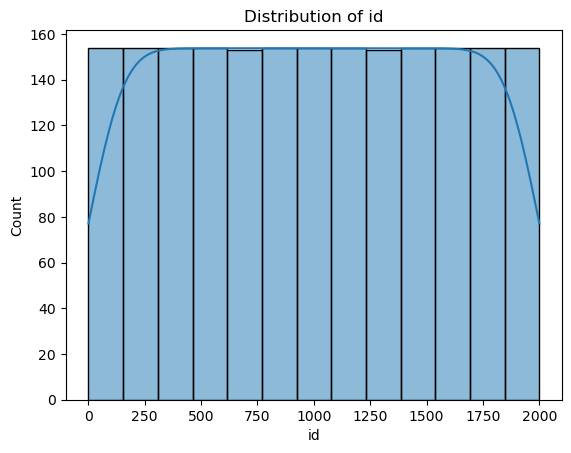

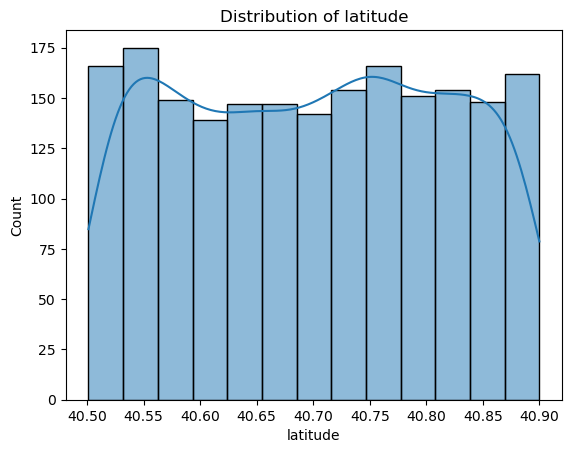

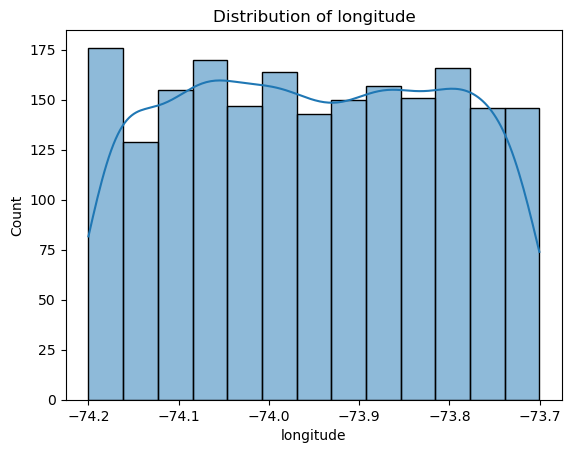

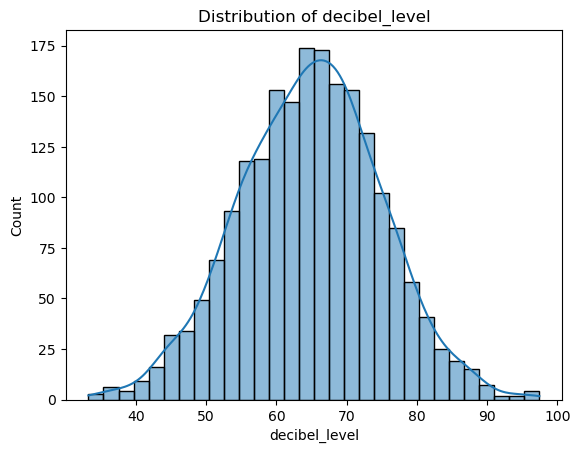

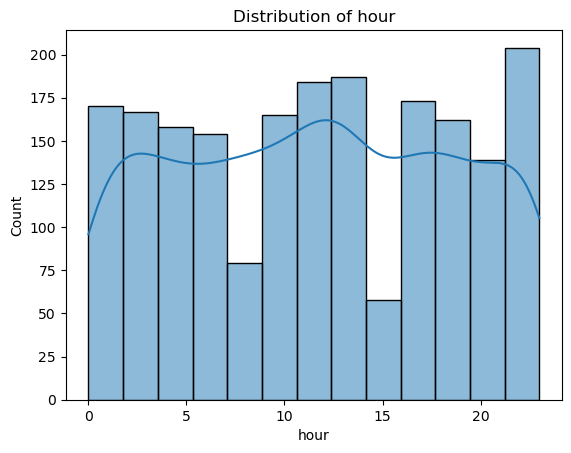

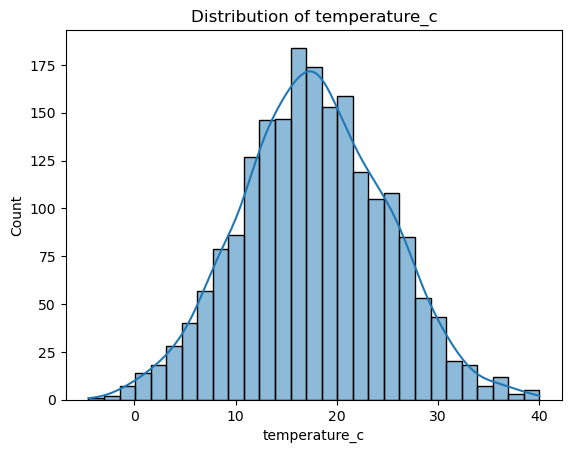

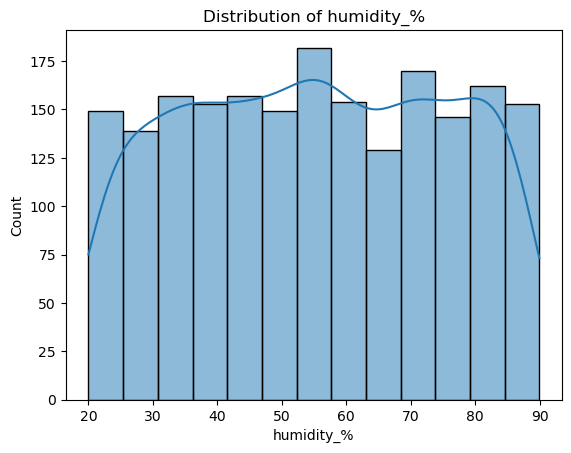

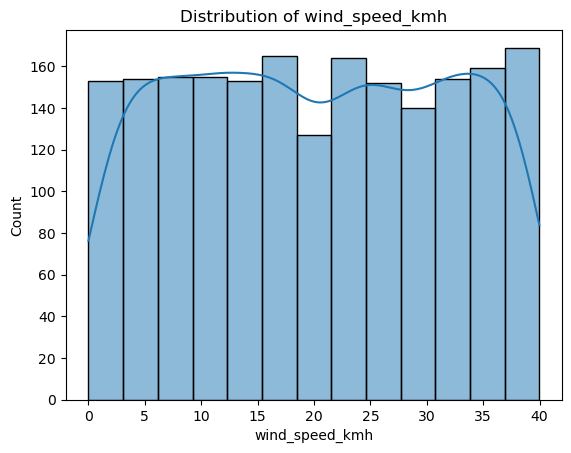

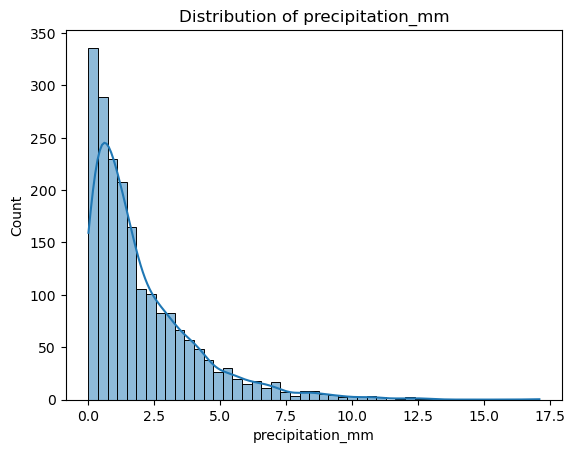

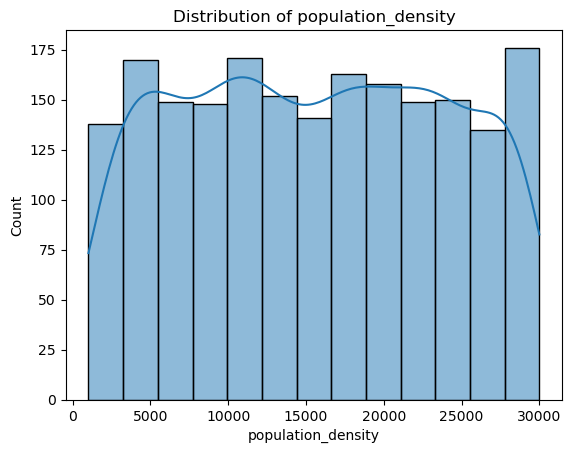

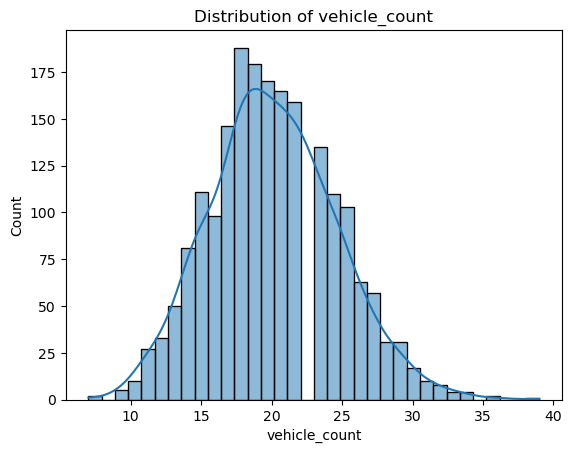

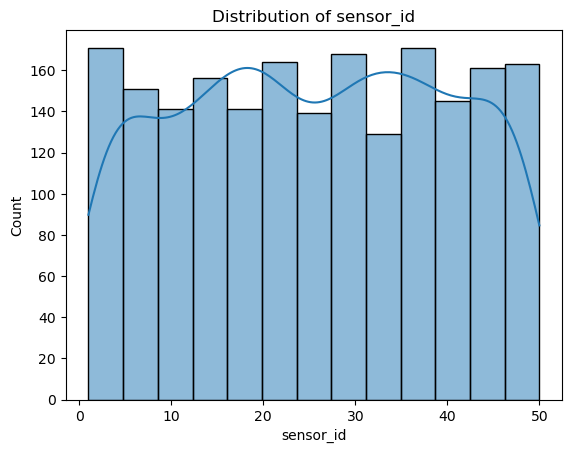

In [143]:
# histogram for numerical columns
for col in num_cols:
  fig, ax=plt.subplots()
  sns.histplot(data=noise, x=col, kde=True, ax=ax)
  ax.set_title(f"Distribution of {col}")
  plt.show()

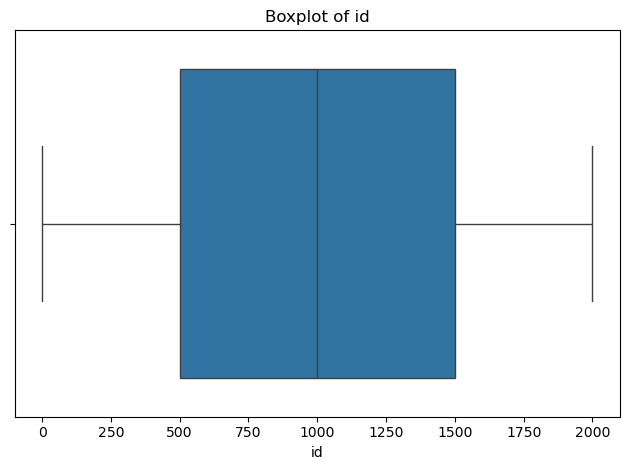

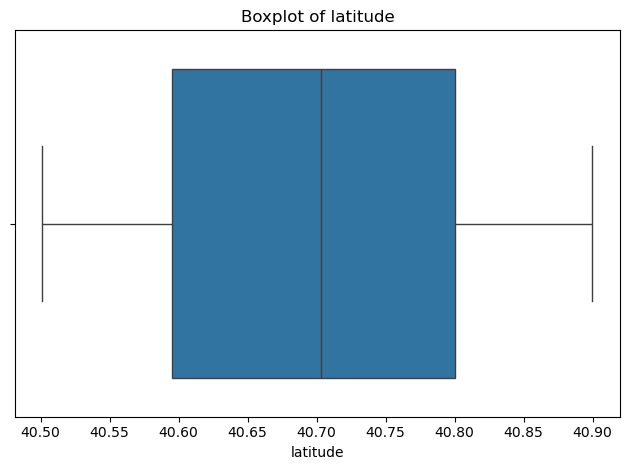

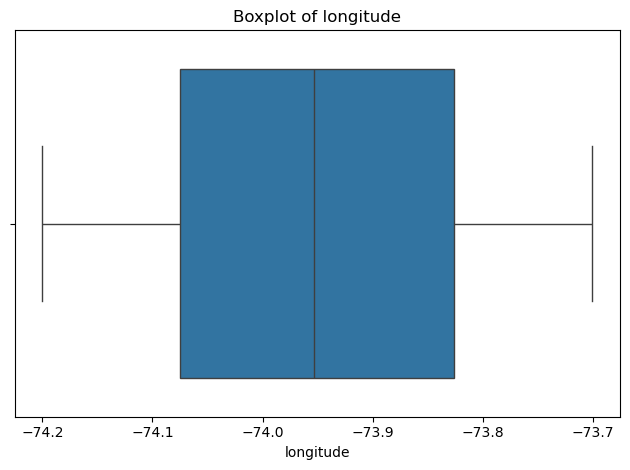

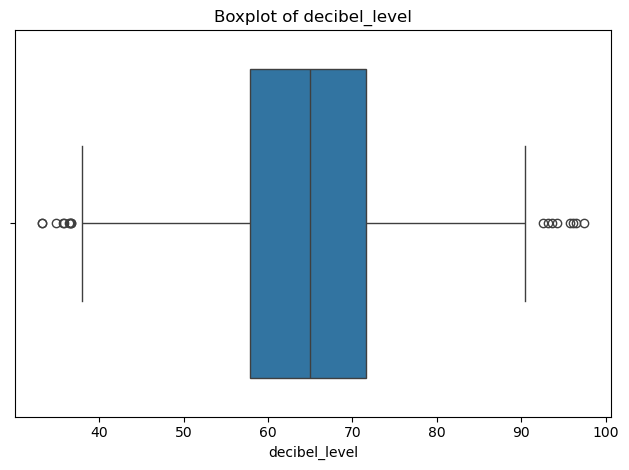

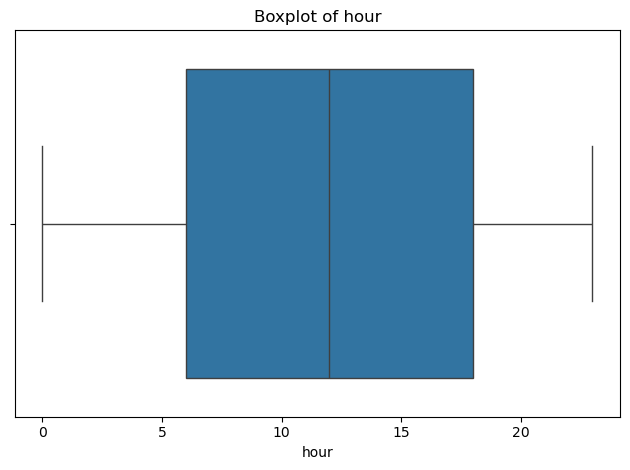

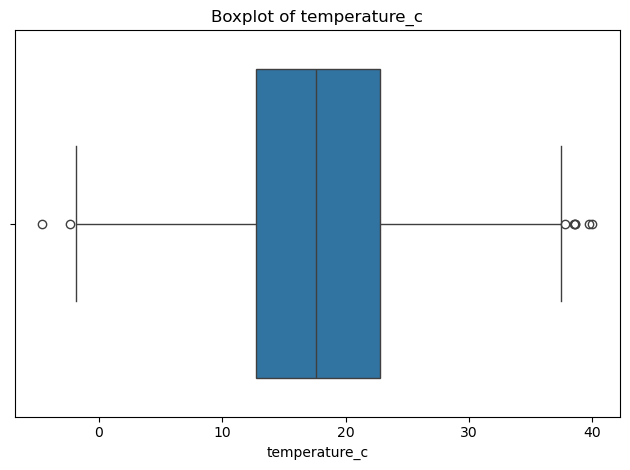

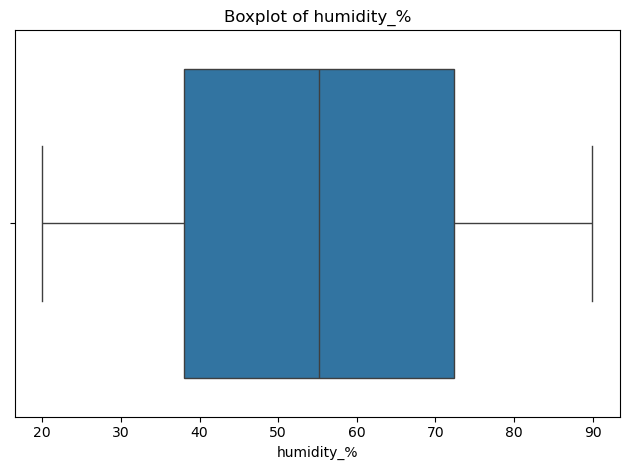

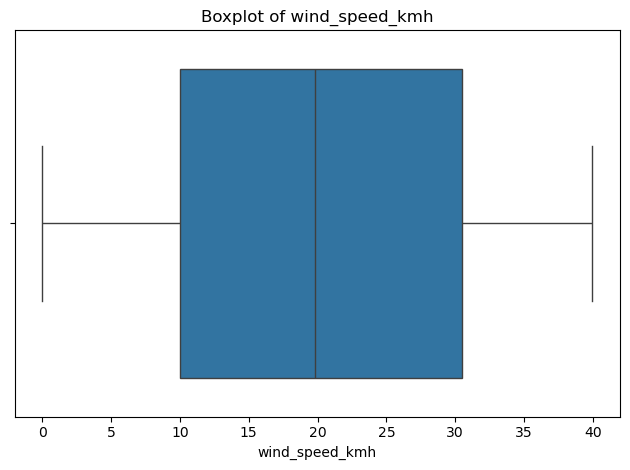

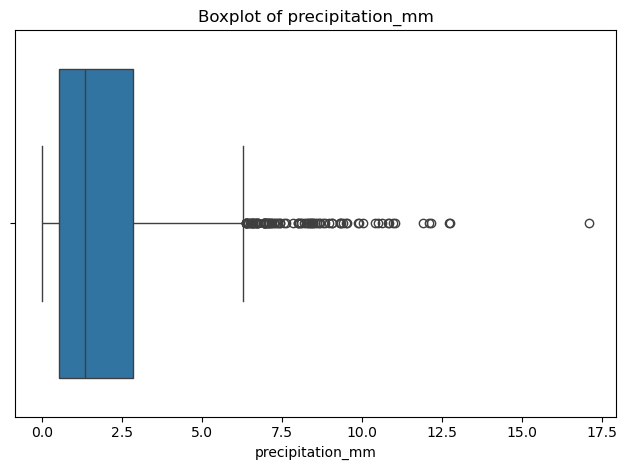

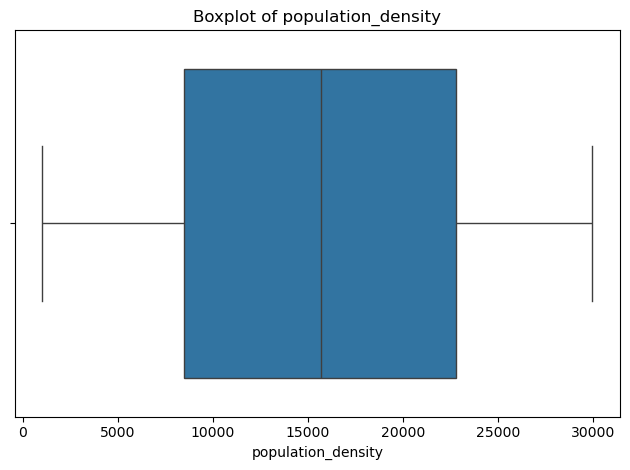

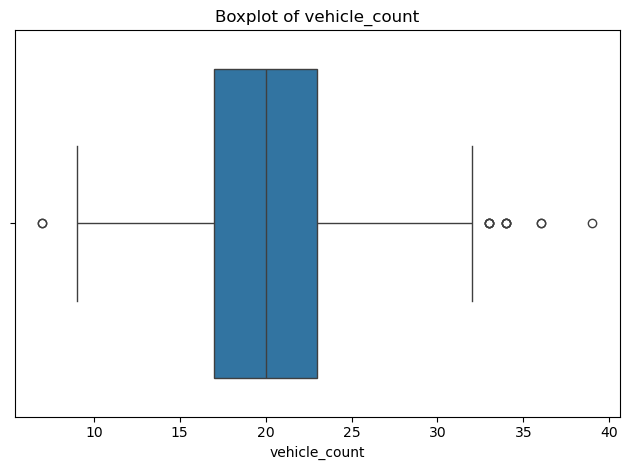

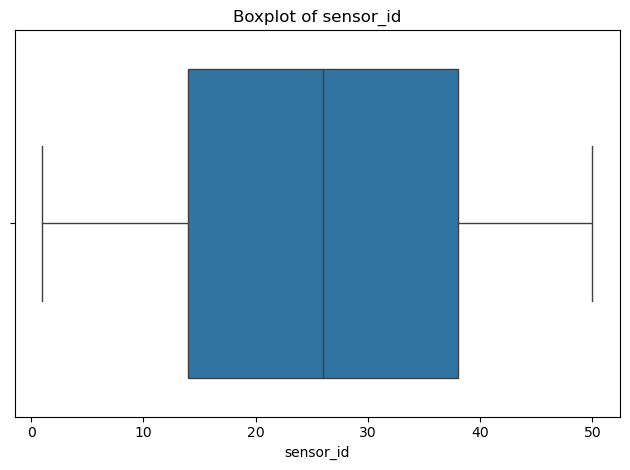

In [189]:
# Boxplots to detect outliers
for col in num_cols:
    fig, ax = plt.subplots()
    sns.boxplot(x=noise[col], ax=ax)
    ax.set_title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()


===== VALUE COUNTS: day_of_week =====
day_of_week
5    307
3    302
2    301
1    285
6    284
4    272
0    249
Name: count, dtype: int64

(Percentage)
day_of_week
5    15.35
3    15.10
2    15.05
1    14.25
6    14.20
4    13.60
0    12.45
Name: proportion, dtype: float64


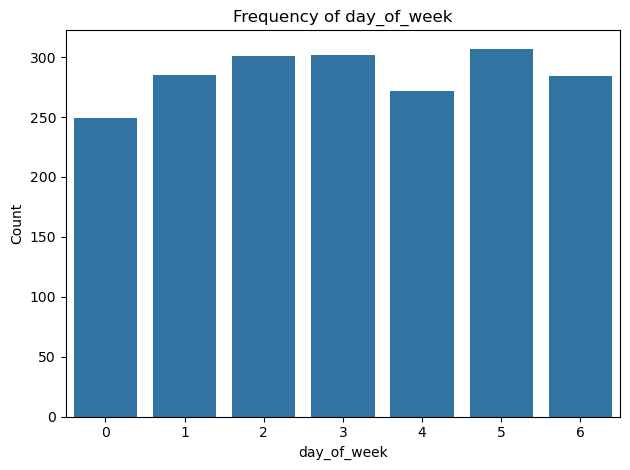


===== VALUE COUNTS: is_weekend =====
is_weekend
0    1409
1     591
Name: count, dtype: int64

(Percentage)
is_weekend
0    70.45
1    29.55
Name: proportion, dtype: float64


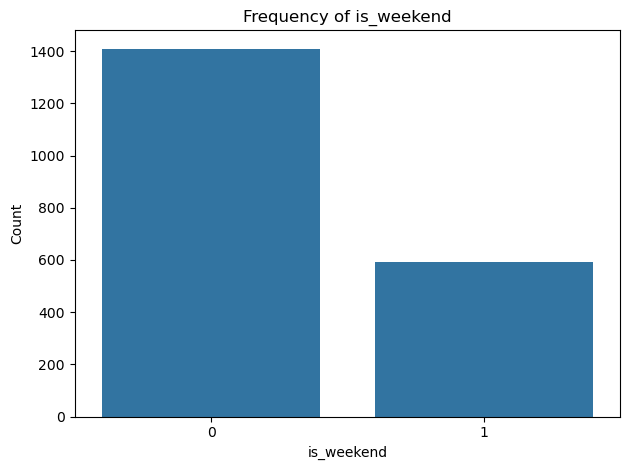


===== VALUE COUNTS: traffic_density =====
traffic_density
2    428
1    423
4    398
3    385
5    366
Name: count, dtype: int64

(Percentage)
traffic_density
2    21.40
1    21.15
4    19.90
3    19.25
5    18.30
Name: proportion, dtype: float64


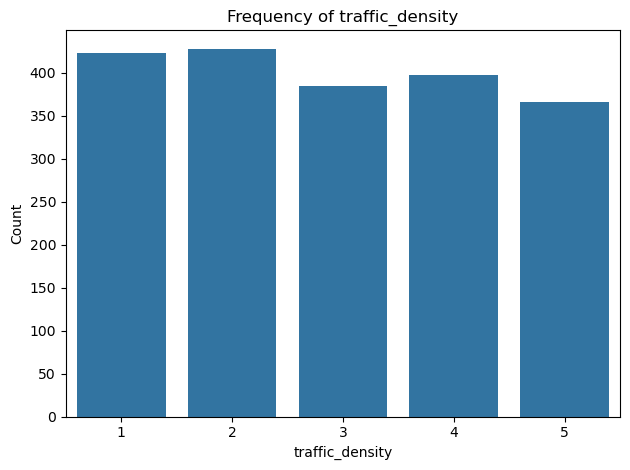


===== VALUE COUNTS: near_airport =====
near_airport
0    1799
1     201
Name: count, dtype: int64

(Percentage)
near_airport
0    89.95
1    10.05
Name: proportion, dtype: float64


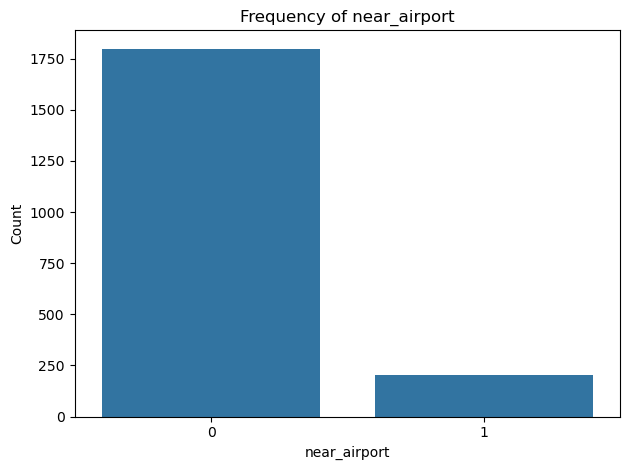


===== VALUE COUNTS: near_highway =====
near_highway
0    1385
1     615
Name: count, dtype: int64

(Percentage)
near_highway
0    69.25
1    30.75
Name: proportion, dtype: float64


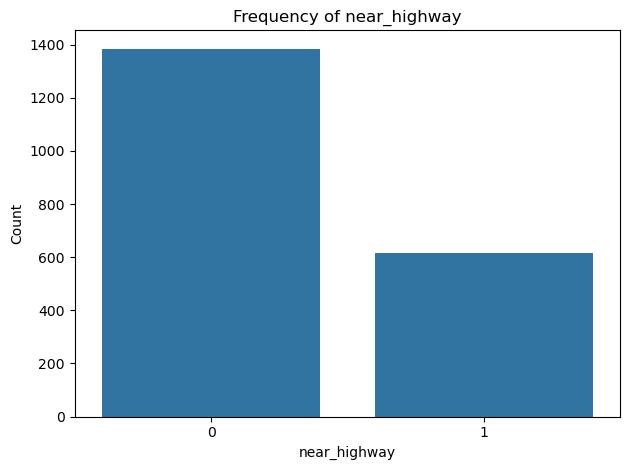


===== VALUE COUNTS: near_construction =====
near_construction
0    1562
1     438
Name: count, dtype: int64

(Percentage)
near_construction
0    78.1
1    21.9
Name: proportion, dtype: float64


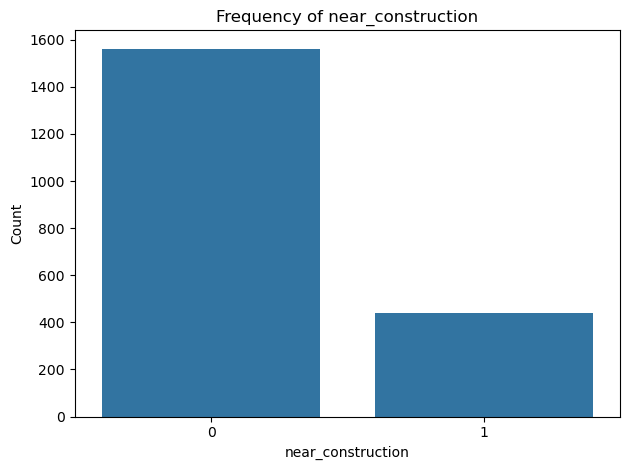


===== VALUE COUNTS: park_proximity =====
park_proximity
0    1005
1     995
Name: count, dtype: int64

(Percentage)
park_proximity
0    50.25
1    49.75
Name: proportion, dtype: float64


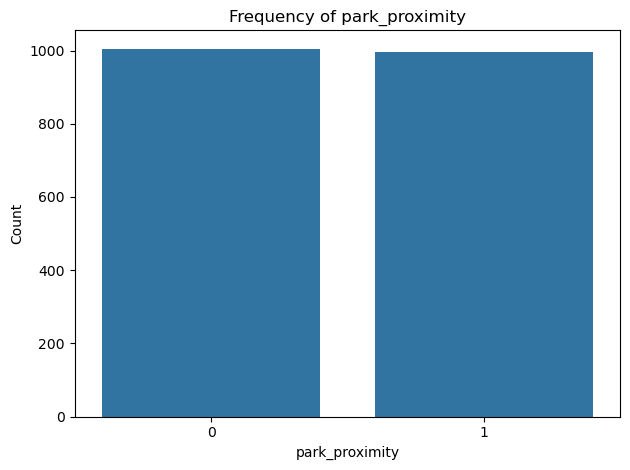


===== VALUE COUNTS: industrial_zone =====
industrial_zone
0    1712
1     288
Name: count, dtype: int64

(Percentage)
industrial_zone
0    85.6
1    14.4
Name: proportion, dtype: float64


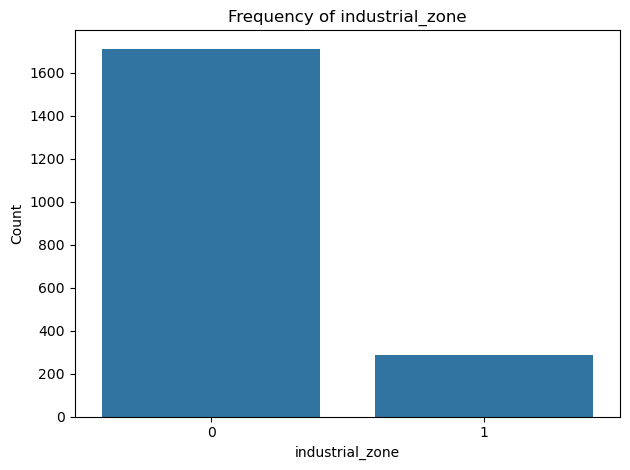


===== VALUE COUNTS: honking_events =====
honking_events
2     470
3     449
4     325
1     306
5     188
6     107
0      88
7      47
8      15
9       4
10      1
Name: count, dtype: int64

(Percentage)
honking_events
2     23.50
3     22.45
4     16.25
1     15.30
5      9.40
6      5.35
0      4.40
7      2.35
8      0.75
9      0.20
10     0.05
Name: proportion, dtype: float64


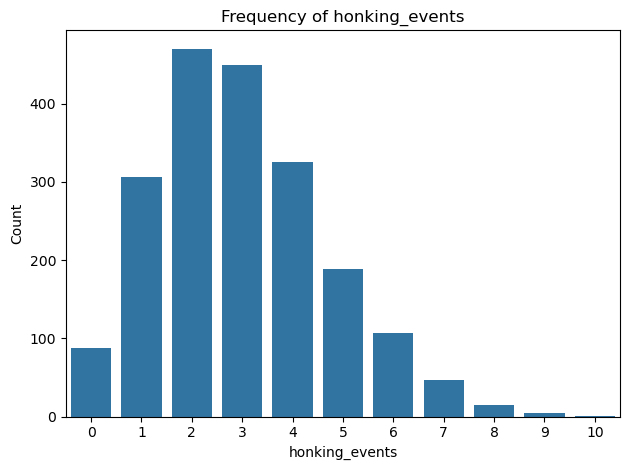


===== VALUE COUNTS: public_event =====
public_event
0    1887
1     113
Name: count, dtype: int64

(Percentage)
public_event
0    94.35
1     5.65
Name: proportion, dtype: float64


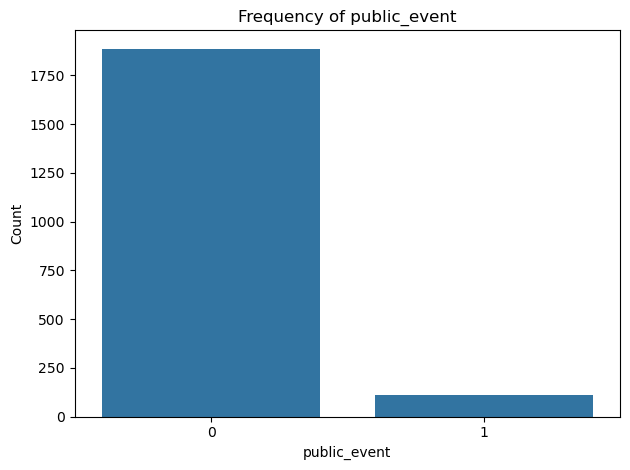


===== VALUE COUNTS: holiday =====
holiday
0    1788
1     212
Name: count, dtype: int64

(Percentage)
holiday
0    89.4
1    10.6
Name: proportion, dtype: float64


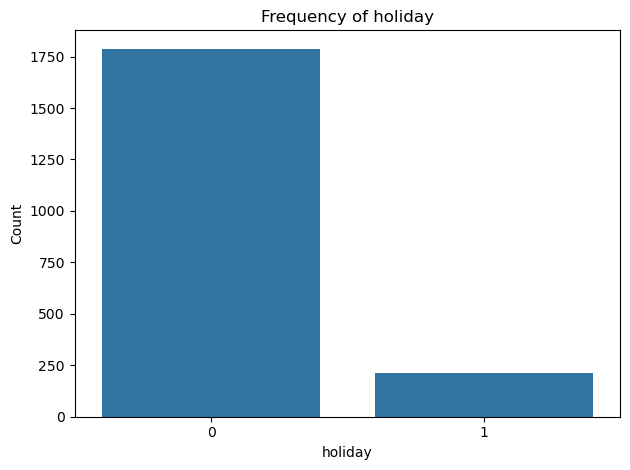


===== VALUE COUNTS: school_zone =====
school_zone
0    1712
1     288
Name: count, dtype: int64

(Percentage)
school_zone
0    85.6
1    14.4
Name: proportion, dtype: float64


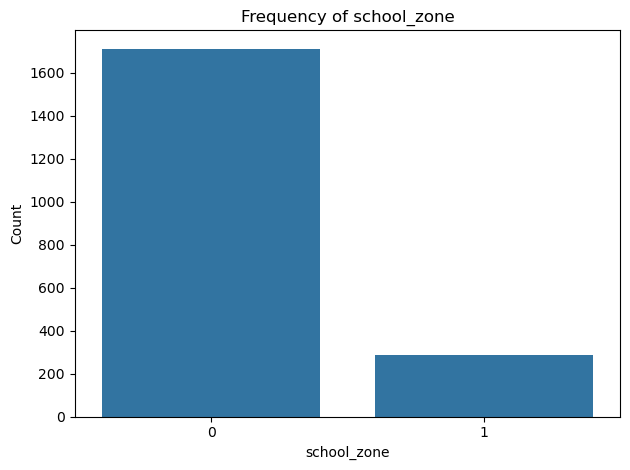


===== VALUE COUNTS: noise_complaints =====
noise_complaints
1    747
0    738
2    362
3    118
4     28
5      7
Name: count, dtype: int64

(Percentage)
noise_complaints
1    37.35
0    36.90
2    18.10
3     5.90
4     1.40
5     0.35
Name: proportion, dtype: float64


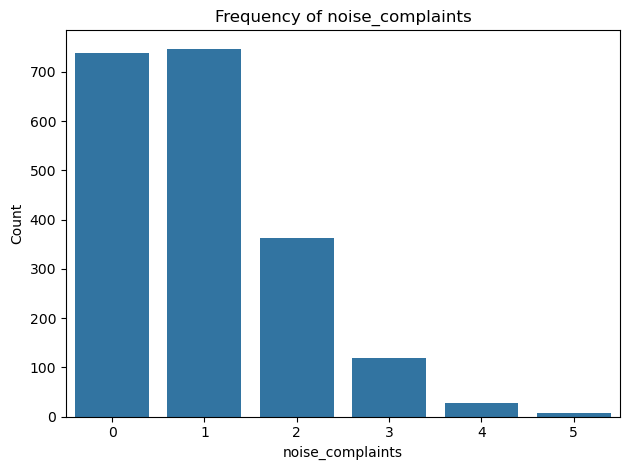

In [159]:
#  ANALYSIS of  CATEGORICAL VARIABLES

for col in cat_cols:
    print(f"\n===== VALUE COUNTS: {col} =====")
    print(noise[col].value_counts())
    print("\n(Percentage)")
    print((noise[col].value_counts(normalize=True) * 100).round(2))

    # Bar plot for each categorical variable
    n = noise[col].value_counts()
    fig, ax = plt.subplots()
    sns.barplot(x=n.index, y=n.values, ax=ax)
    ax.set_title(f"Frequency of {col}")
    ax.set_ylabel("Count")
  #  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


===== CORRELATION MATRIX (NUMERIC) =====
                      id  latitude  longitude  decibel_level  hour  \
id                  1.00      0.01      -0.01          -0.00 -0.01   
latitude            0.01      1.00       0.00          -0.03 -0.01   
longitude          -0.01      0.00       1.00           0.01 -0.00   
decibel_level      -0.00     -0.03       0.01           1.00 -0.01   
hour               -0.01     -0.01      -0.00          -0.01  1.00   
temperature_c       0.01      0.02       0.01           0.03 -0.02   
humidity_%          0.01      0.05      -0.04           0.01  0.03   
wind_speed_kmh     -0.01     -0.02       0.03           0.03  0.02   
precipitation_mm    0.01     -0.01       0.01           0.00 -0.02   
population_density  0.02      0.01       0.01          -0.04  0.01   
vehicle_count      -0.01      0.01      -0.03           0.01 -0.03   
sensor_id          -0.00      0.00      -0.01          -0.02 -0.01   

                    temperature_c  humidity_%  

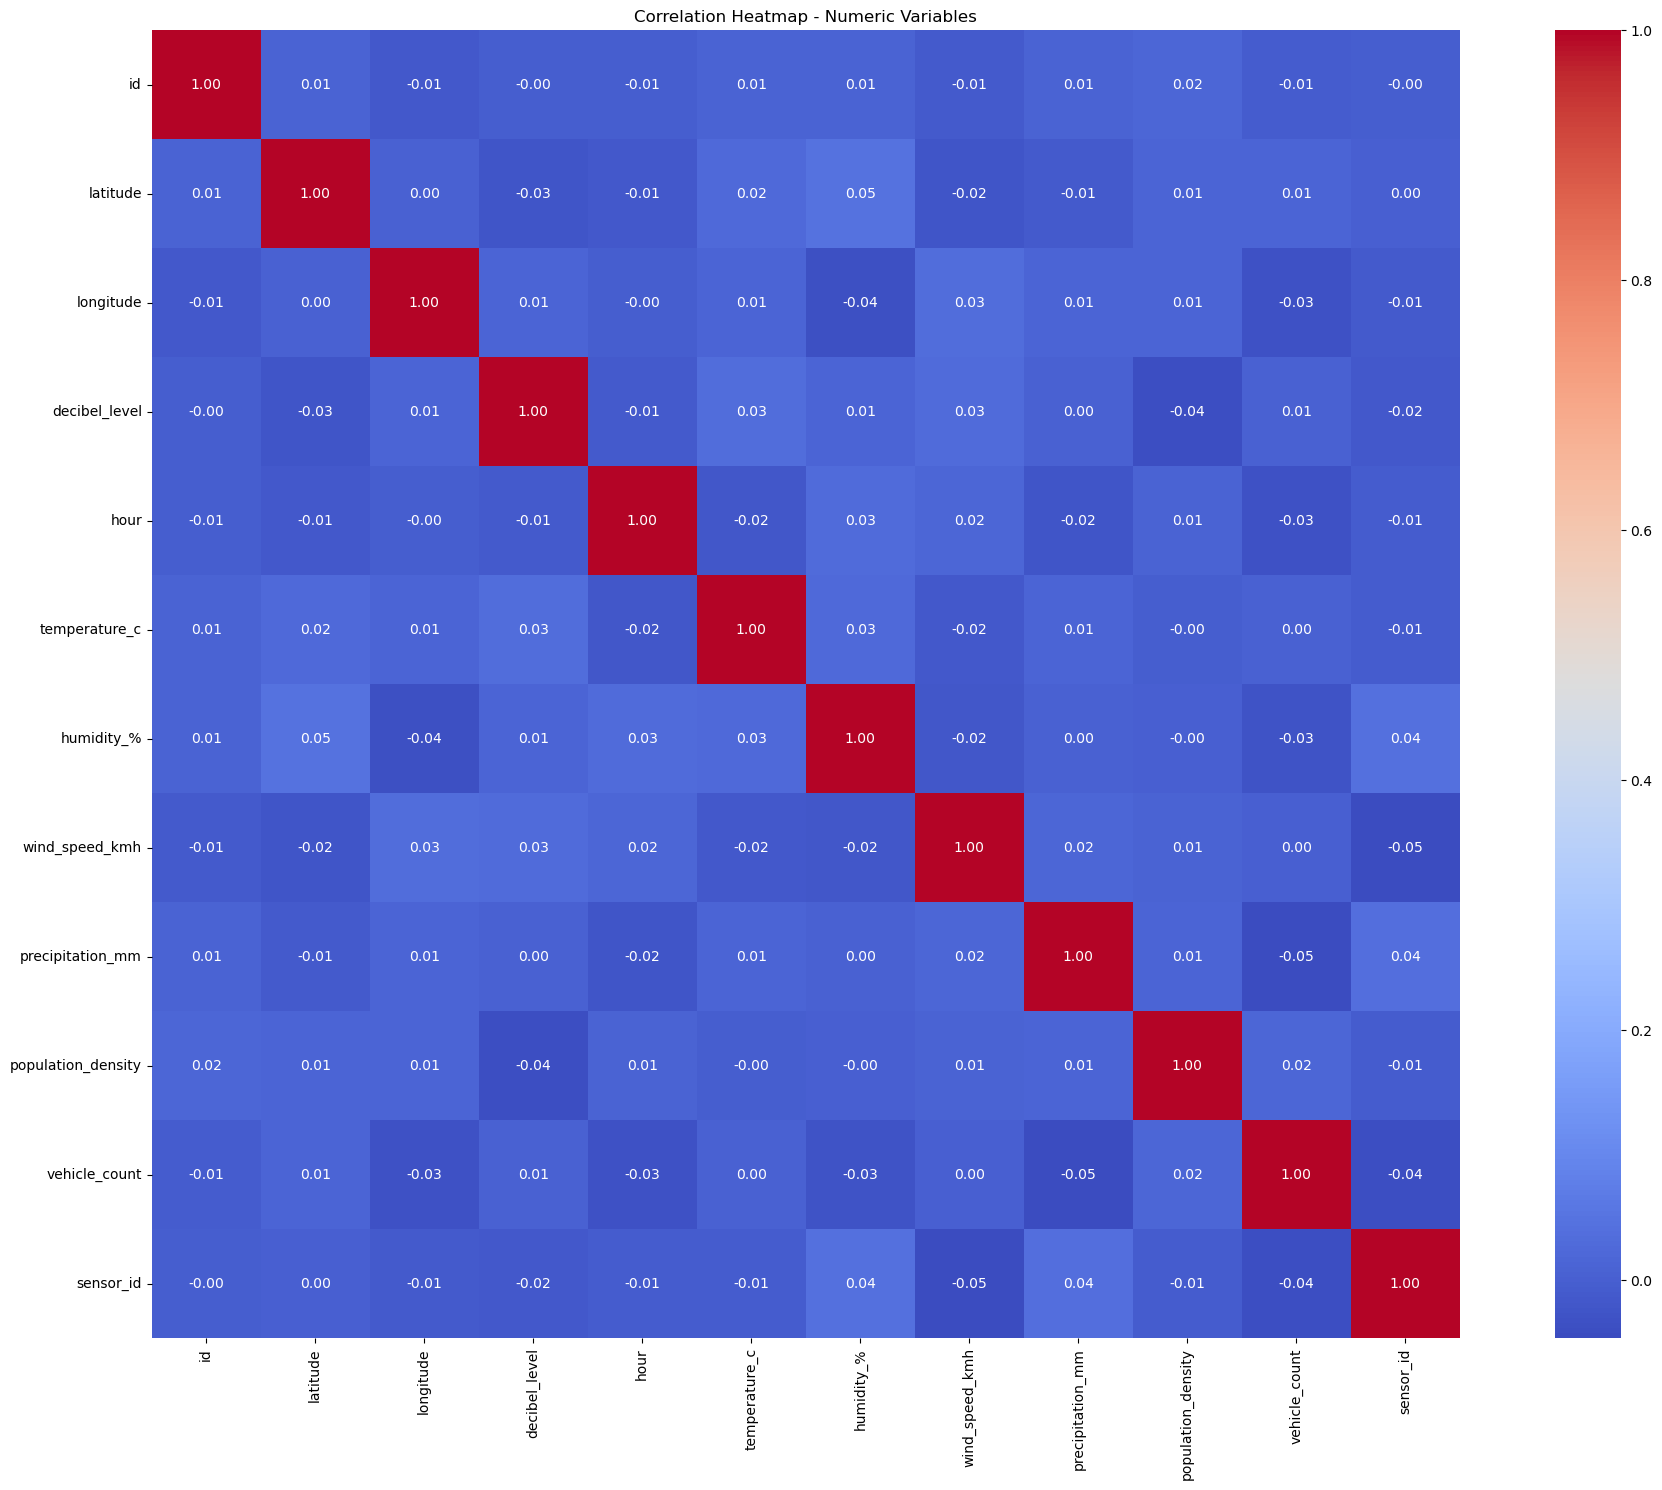

In [217]:
# CORRELATION ANALYSIS (NUMERIC)

corr = noise[num_cols].corr()

print("\n===== CORRELATION MATRIX (NUMERIC) =====")
print(corr.round(2))

plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap - Numeric Variables")
plt.tight_layout()
plt.show()

In [163]:
# KEY RELATIONSHIPS (SCATTER PLOTS)

def scatter_with_reg(x_col, y_col, data):
    fig, ax = plt.subplots()
    sns.regplot(data=data, x=x_col, y=y_col, ax=ax, scatter_kws={"alpha": 0.7})
    ax.set_title(f"{y_col} vs {x_col}")
    plt.tight_layout()
    plt.show()

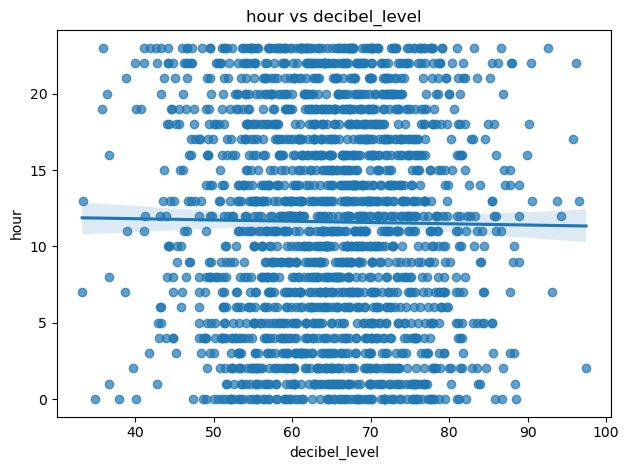

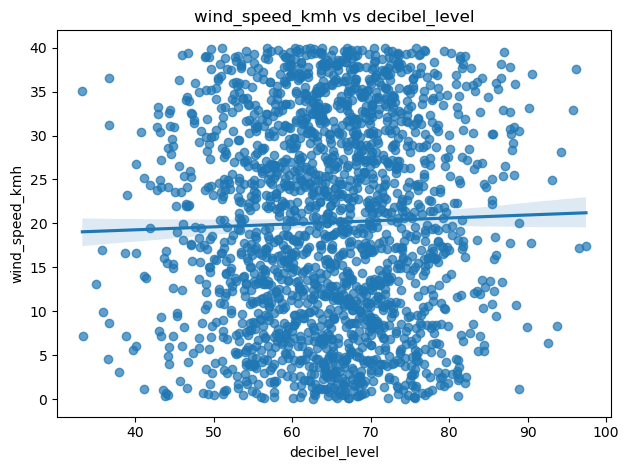

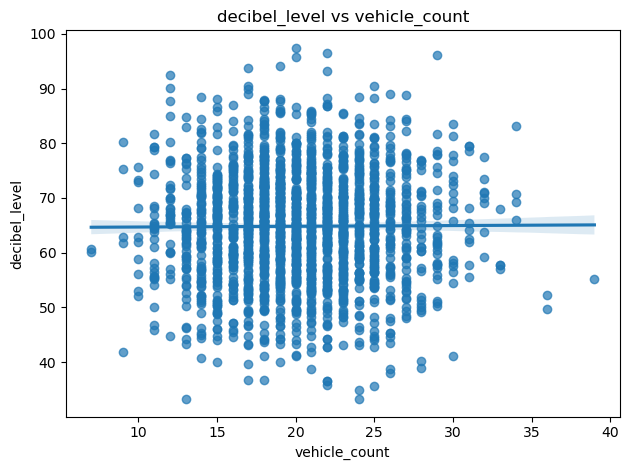

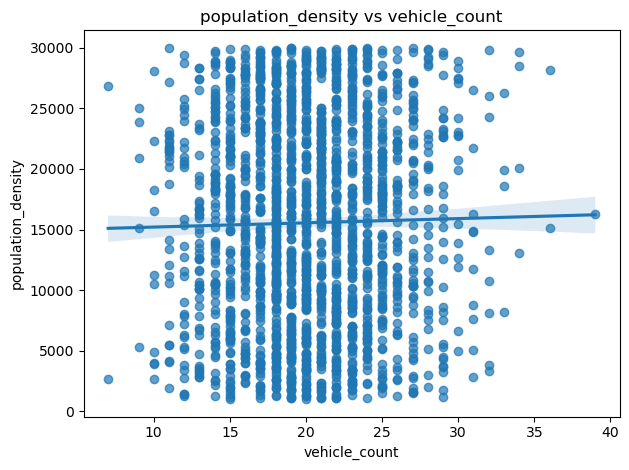

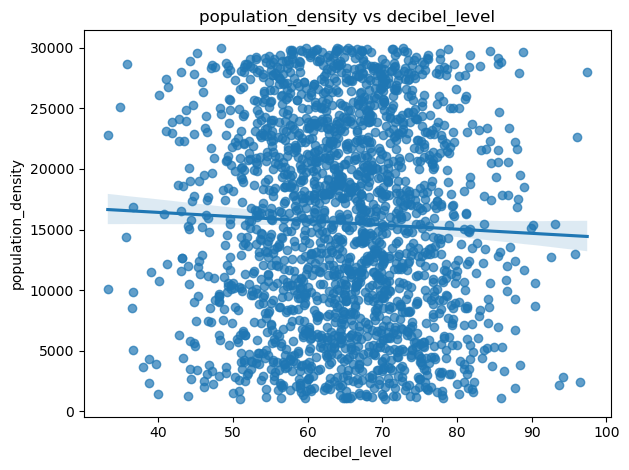

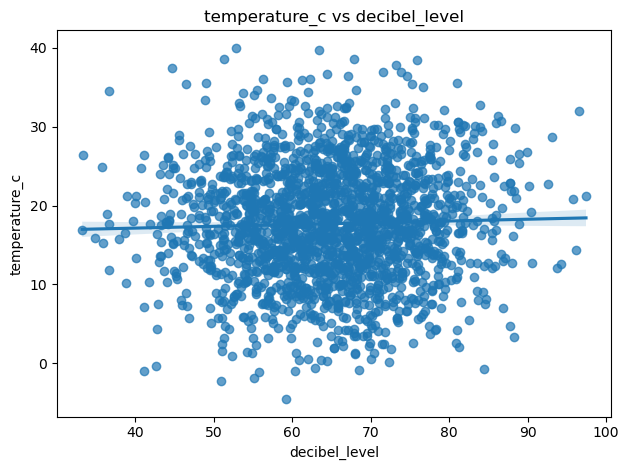

In [361]:
# (1) decibel_level vs hour
scatter_with_reg("decibel_level", "hour", noise)

# (2) decibel_level vs wind_speed_kmh
scatter_with_reg("decibel_level", "wind_speed_kmh", noise)


# (3) decibel_level vs vehicle_count
scatter_with_reg("vehicle_count", "decibel_level",noise)
# (4) population_density vs vehicle_count
scatter_with_reg("vehicle_count", "population_density",noise)
# (5) decibel_level vs population_density
scatter_with_reg("decibel_level", "population_density",noise)
# (6) decibel_level vs temperature_c
scatter_with_reg("decibel_level", "temperature_c", noise)

In [309]:
hour_noise = noise.groupby('hour')['decibel_level'].mean()
print(new_noise.head(10))

hour
0    64.797418
1    65.757810
2    65.672085
3    64.433350
4    62.345333
5    65.301969
6    63.772562
7    65.813443
8    62.339154
9    64.984254
Name: decibel_level, dtype: float64


<Figure size 2000x3000 with 0 Axes>

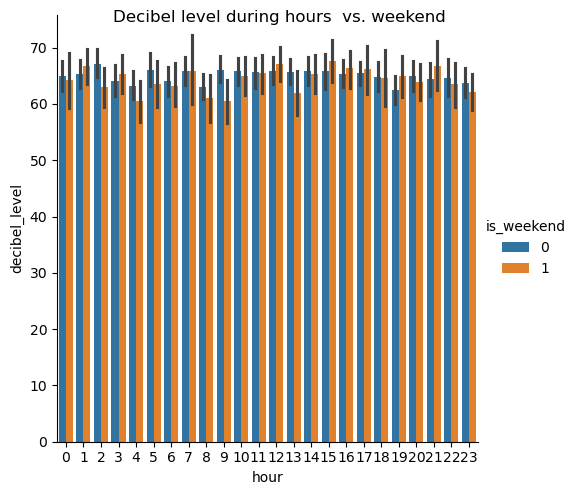

In [323]:
fig, ax = plt.subplots()
ax.his(data=noise, x='hour', y='decibel_level', kind='bar', hue='is_weekend')
g.fig.suptitle("Decibel level during hours  vs. weekend")
plt.show()

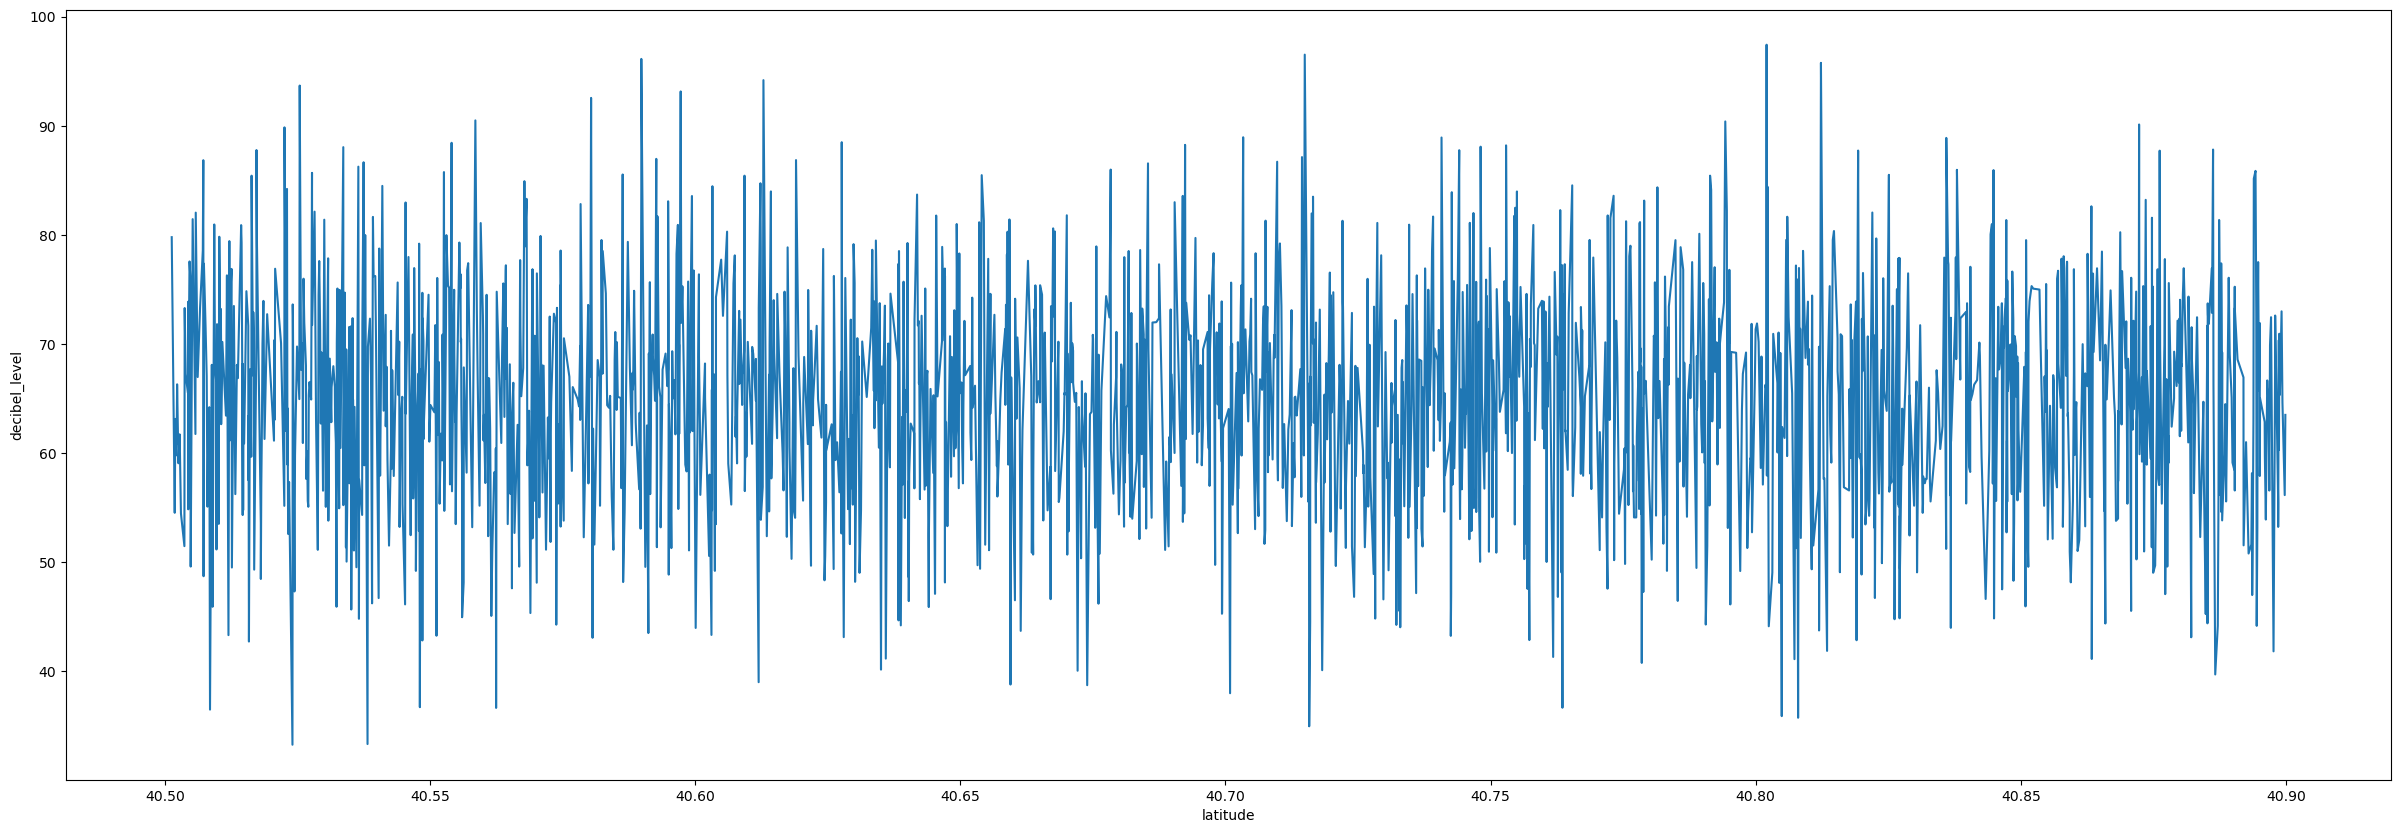

In [233]:
plt.figure(figsize=(10,10))
sns.lineplot(data=noise, x='temperature_c', y='decibel_level')
plt.show()

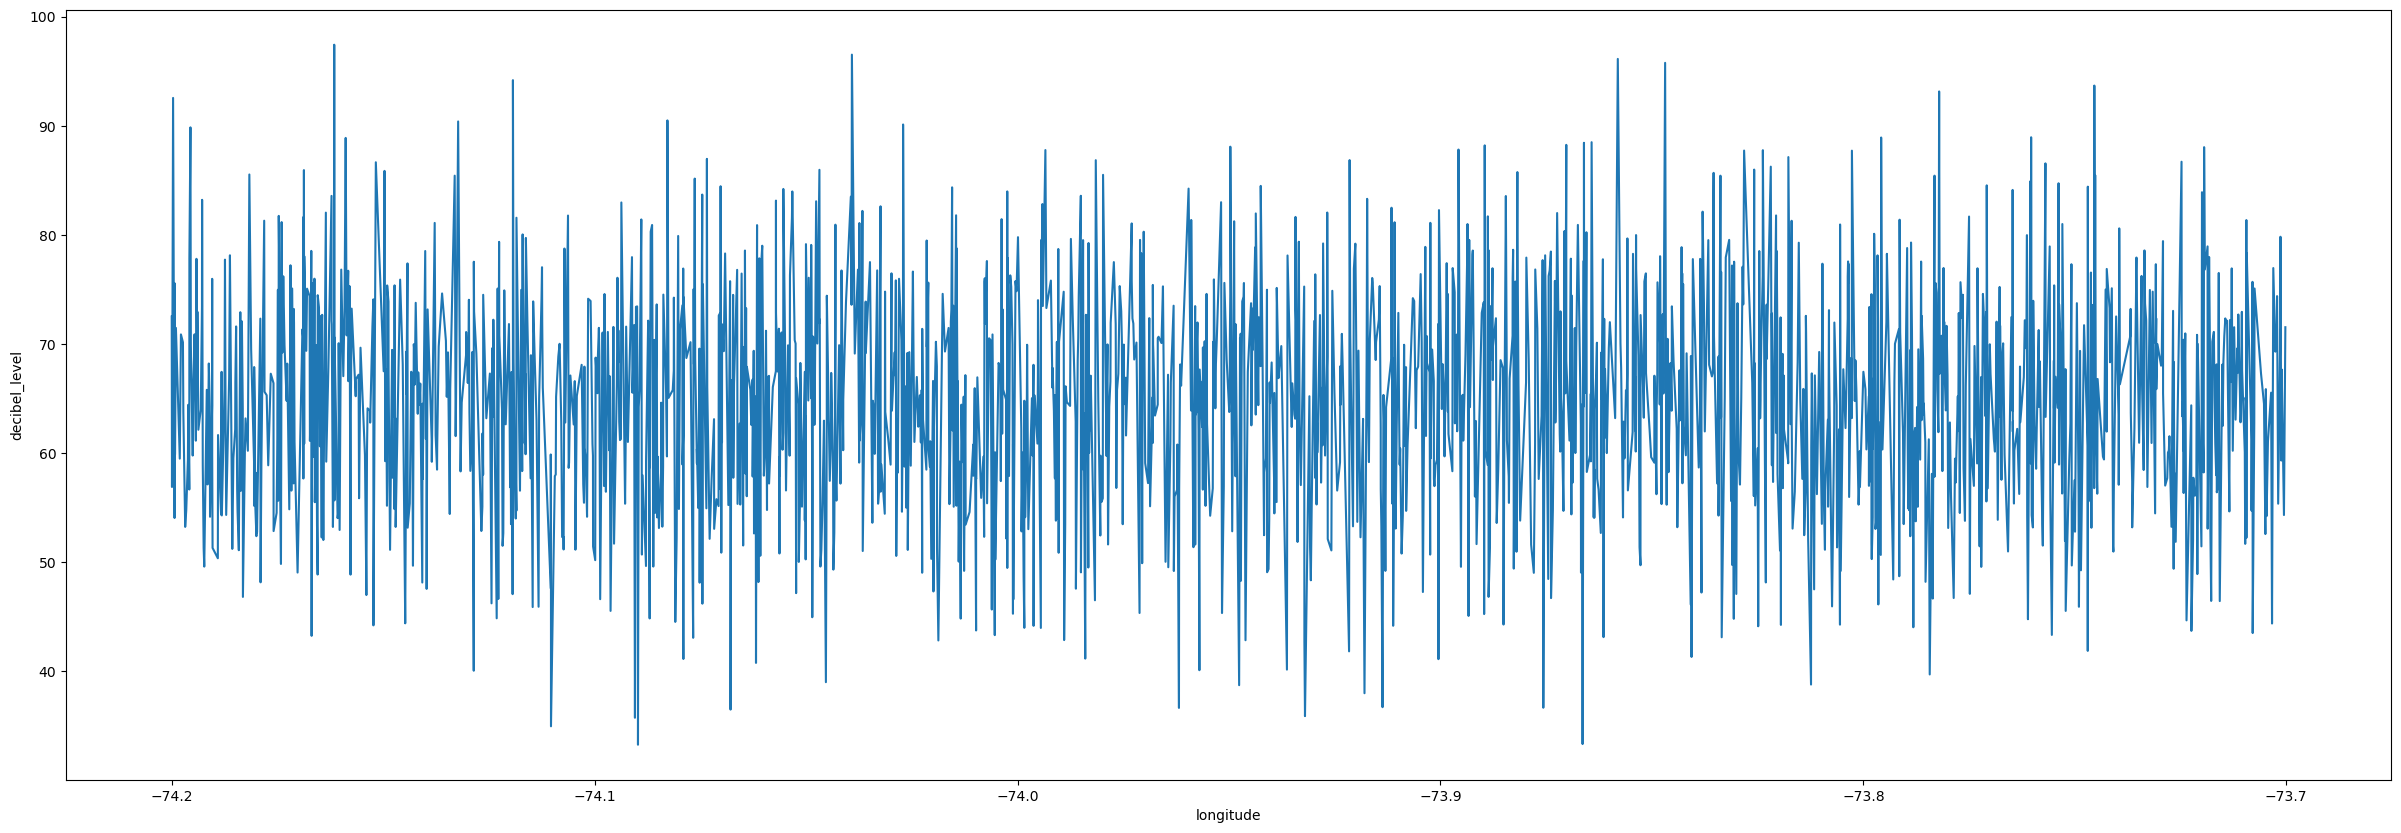

In [235]:
plt.figure(figsize=(30,10))
sns.lineplot(data=noise, x='longitude', y='decibel_level')
plt.show()

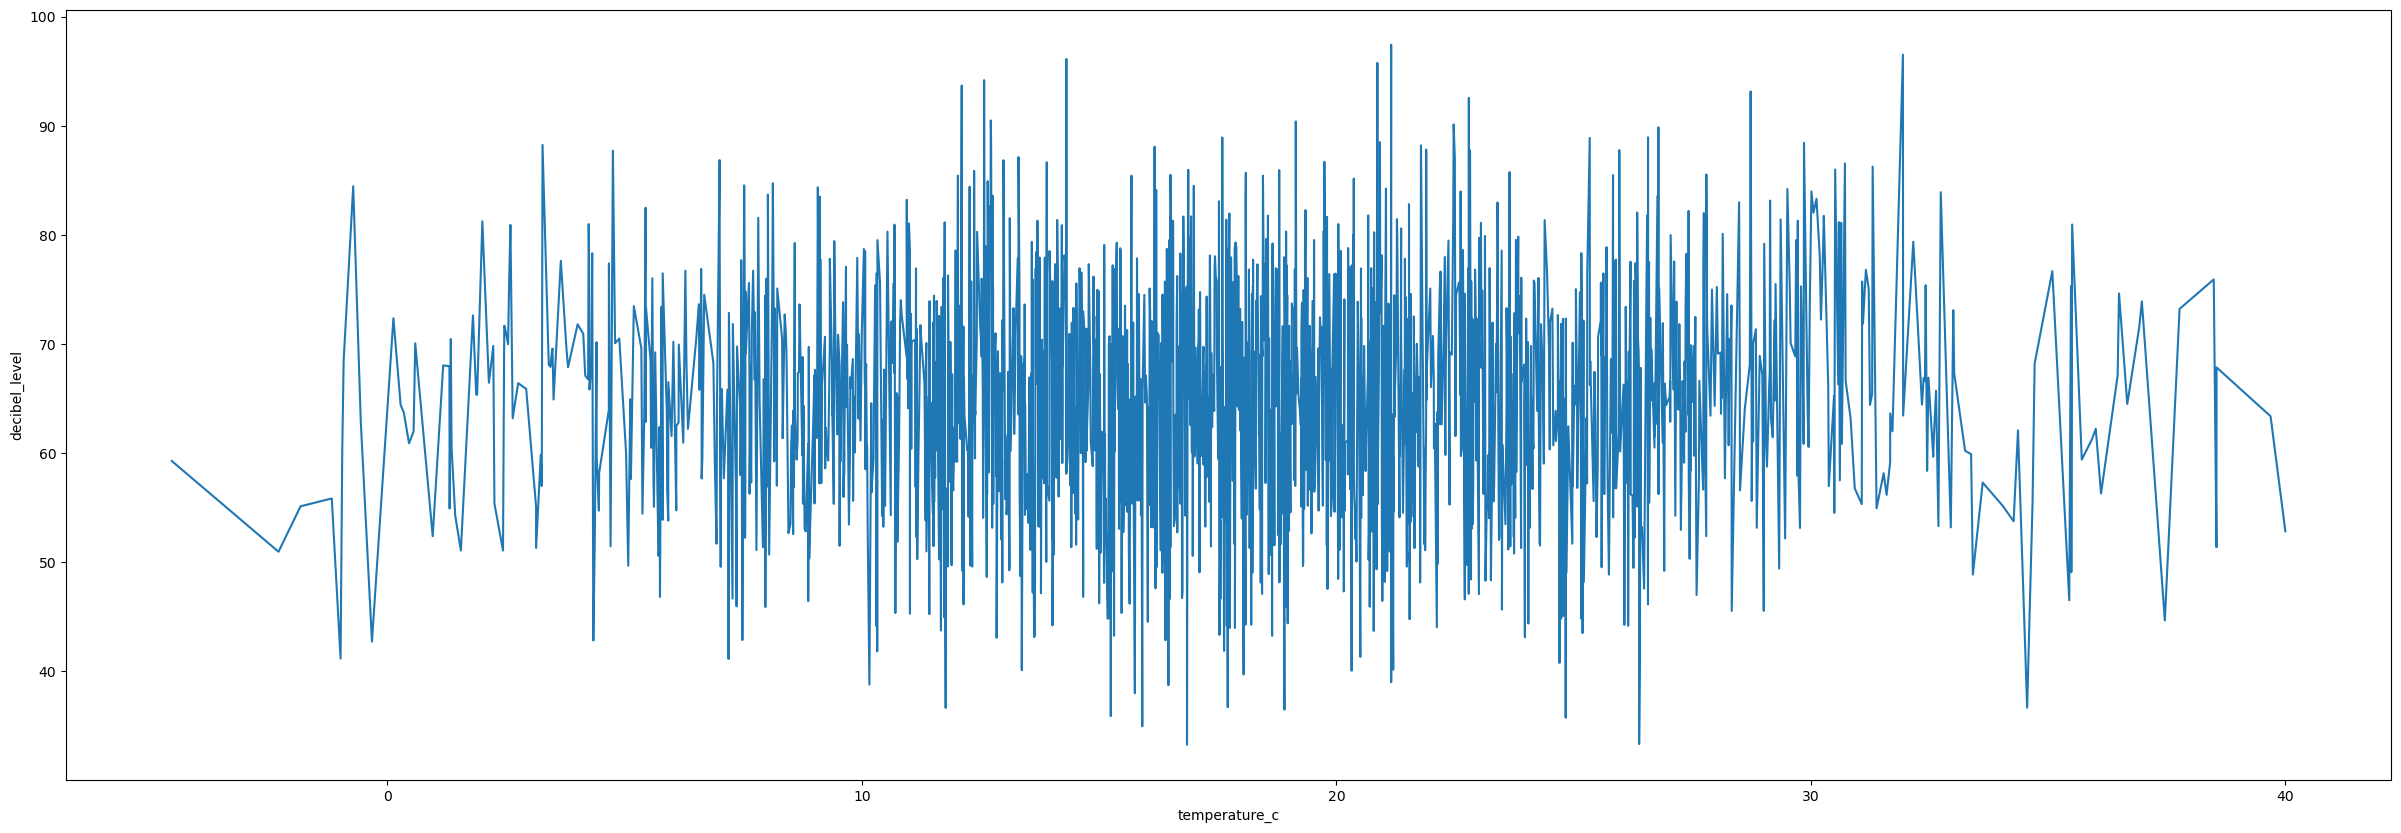

In [231]:
plt.figure(figsize=(30,10))
sns.lineplot(data=noise, x='temperature_c', y='decibel_level')
plt.show()

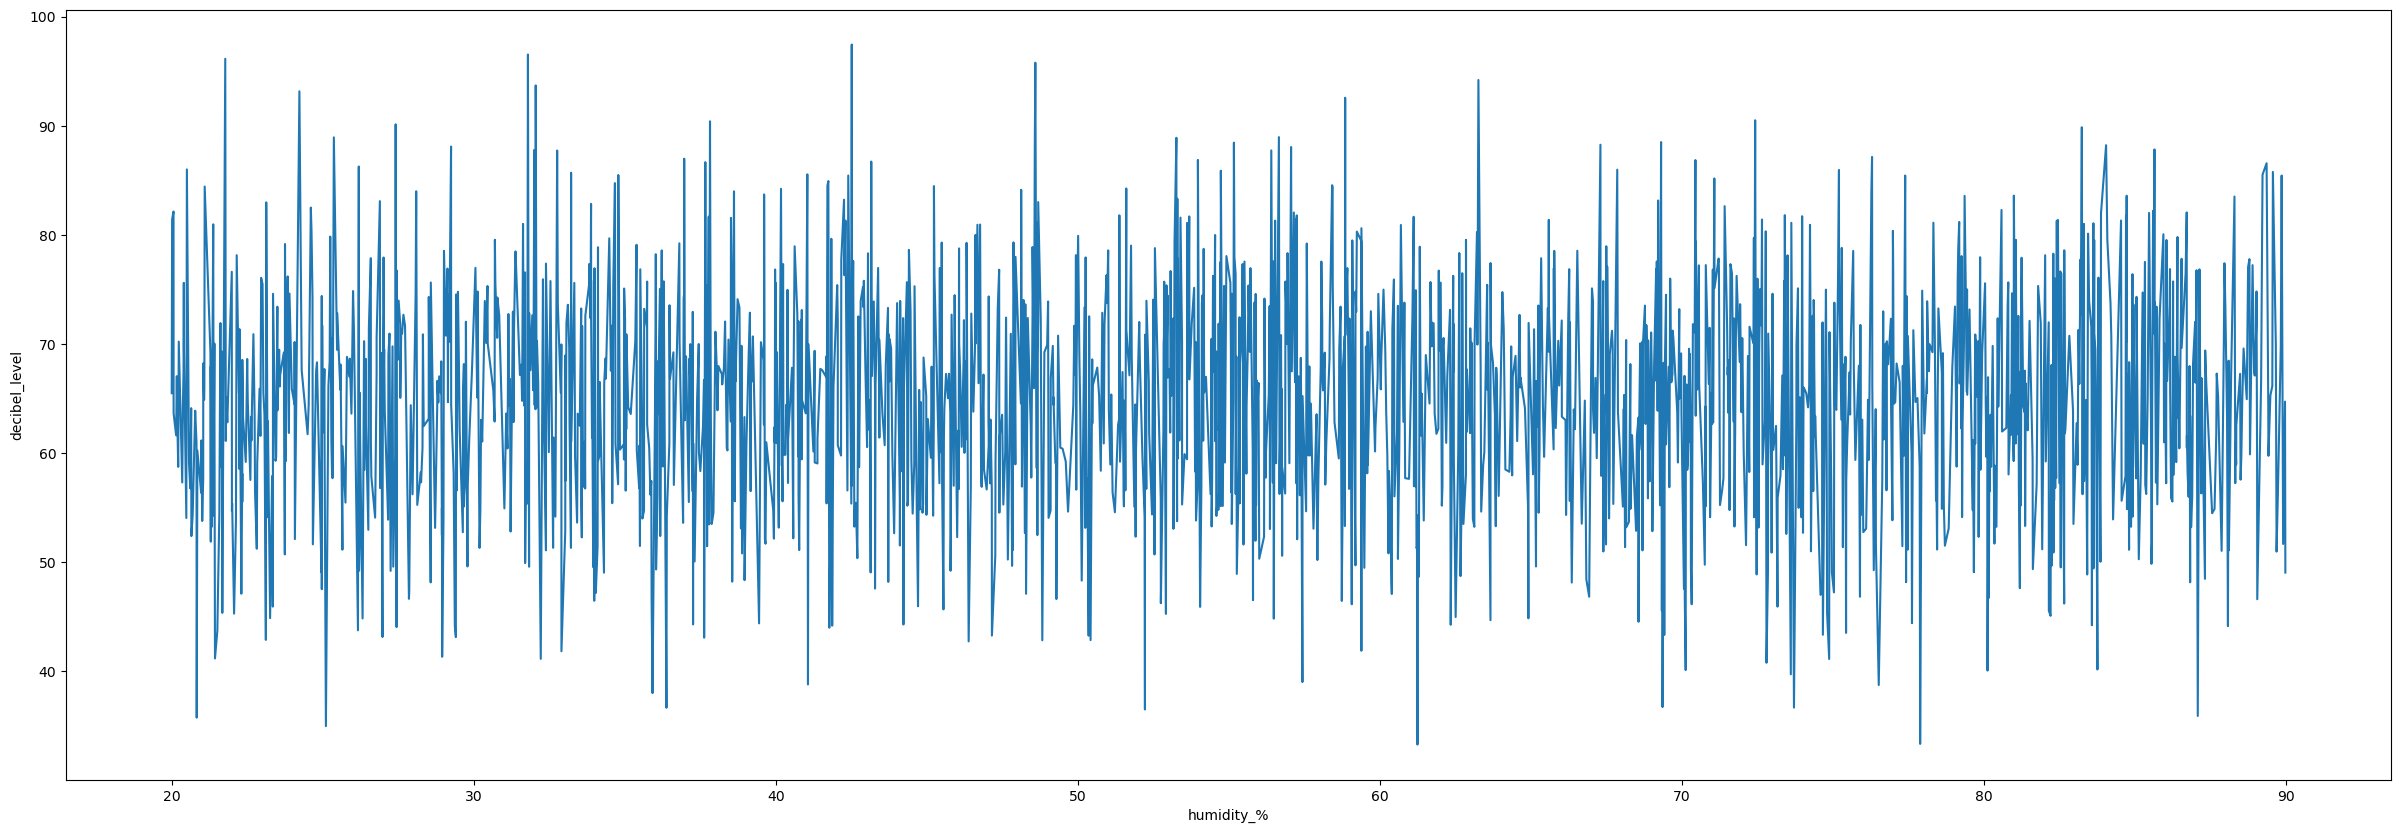

In [237]:
plt.figure(figsize=(30,10))
sns.lineplot(data=noise, x='humidity_%', y='decibel_level')
plt.show()

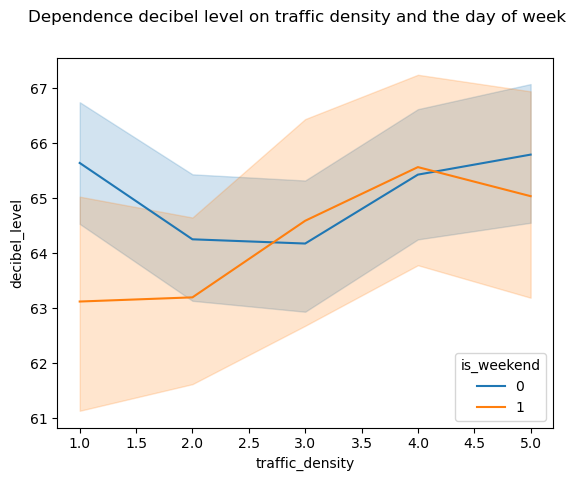

In [355]:
g=sns.lineplot(data=noise, x='traffic_density', y='decibel_level', hue='is_weekend')
g.figure.suptitle("Dependence decibel level on traffic density and the day of week")
plt.show()

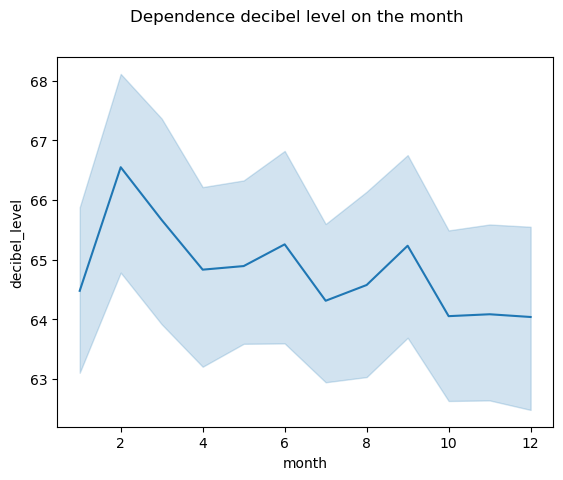

In [359]:
#plt.figure(figsize=(20,10))
g=sns.lineplot(data=noise, x='month', y='decibel_level')
g.figure.suptitle("Dependence decibel level on the month")
plt.show()

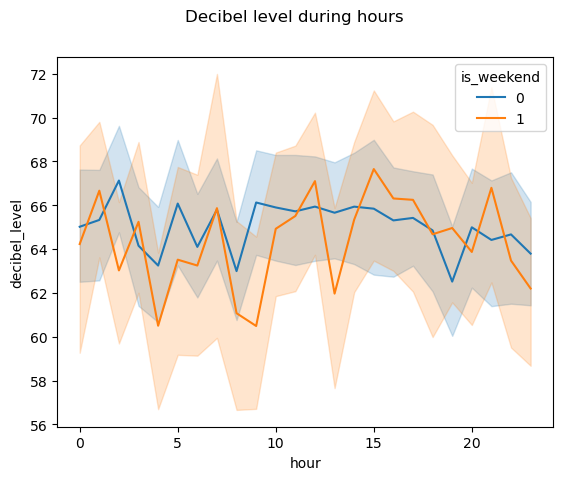

In [349]:

g=sns.lineplot(data=noise, x='hour', y='decibel_level', hue='is_weekend')
g.figure.suptitle("Decibel level during hours ")
plt.show()

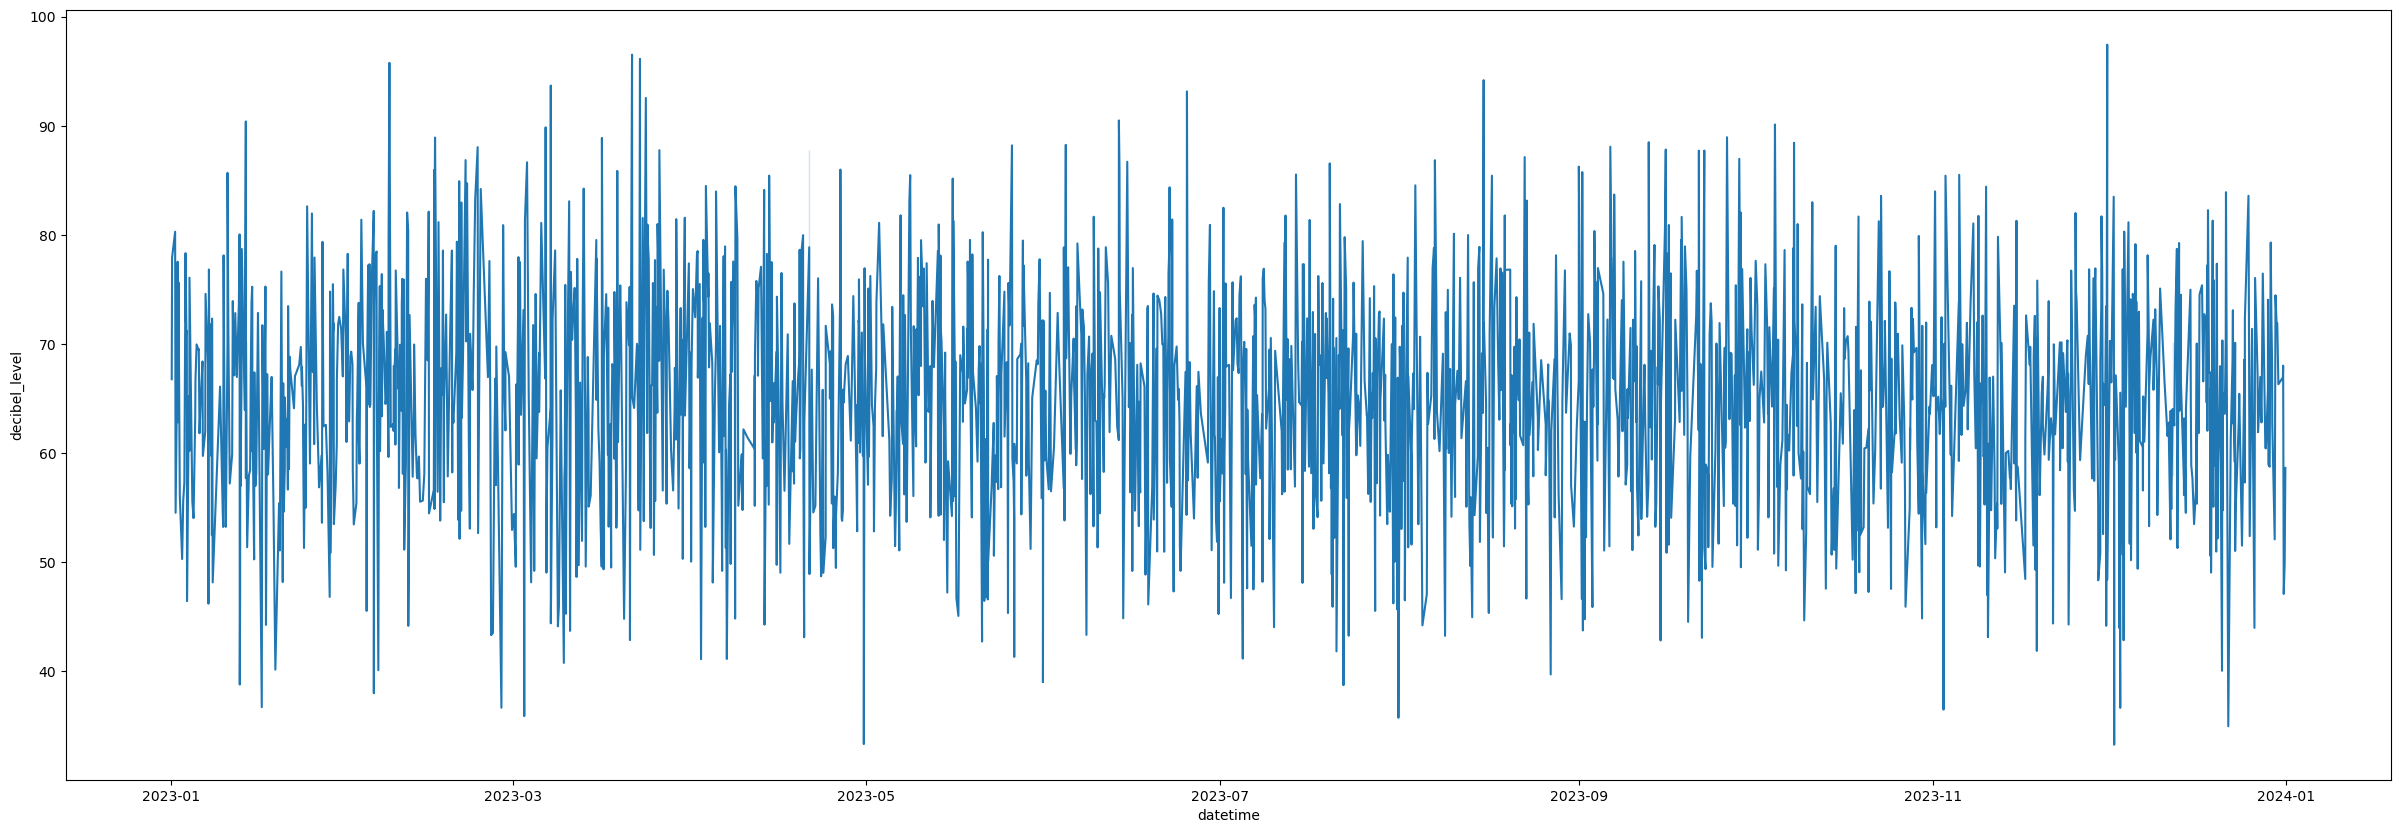

In [239]:
plt.figure(figsize=(30,10))
sns.lineplot(data=noise, x='datetime', y='decibel_level')
plt.show()

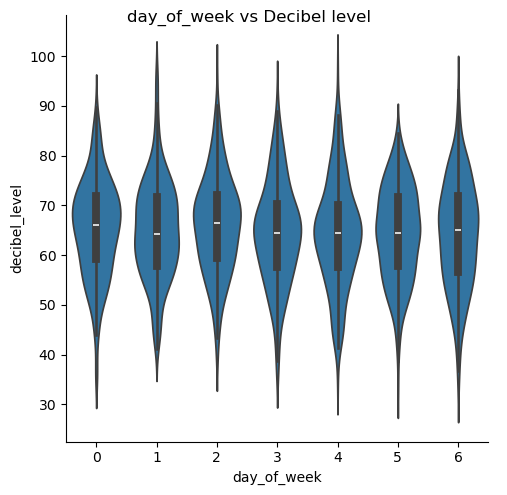

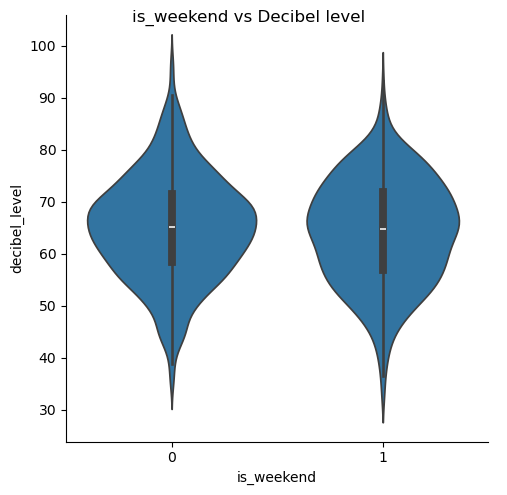

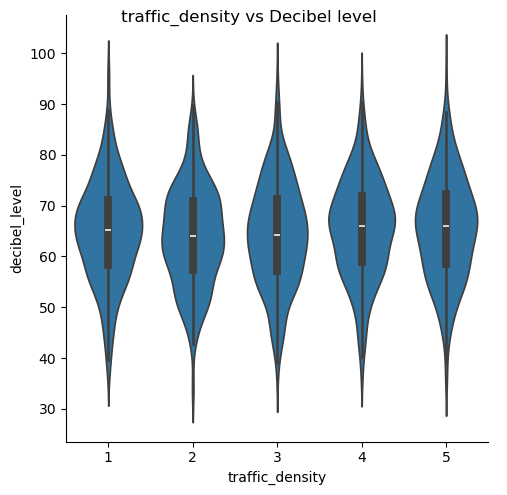

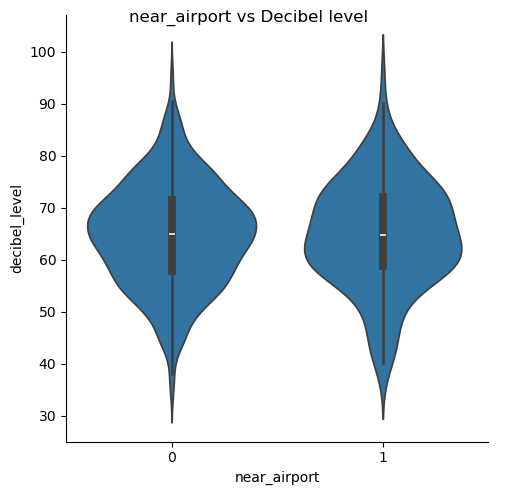

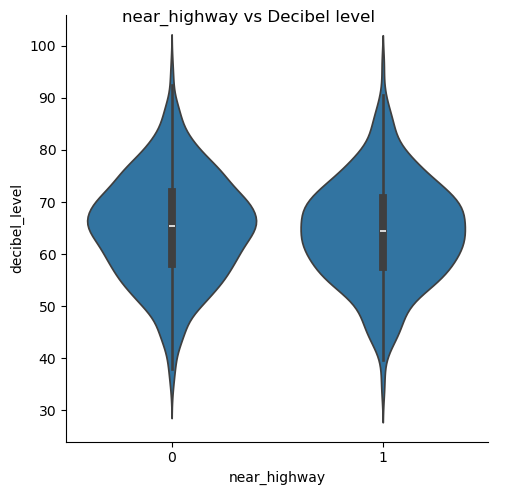

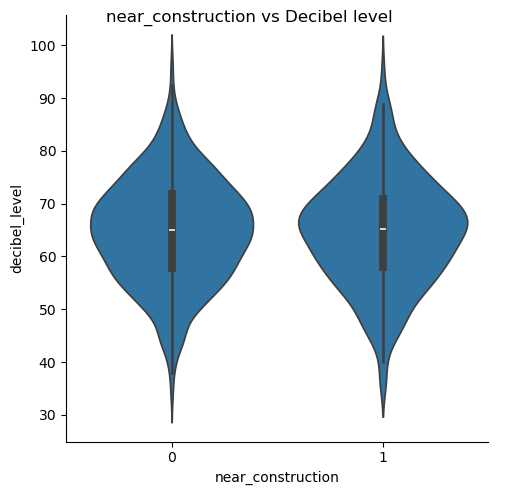

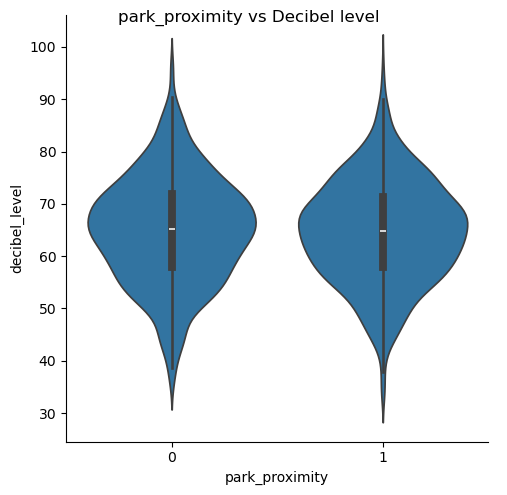

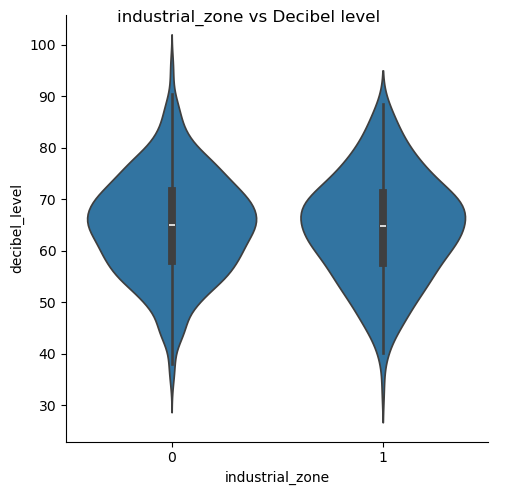

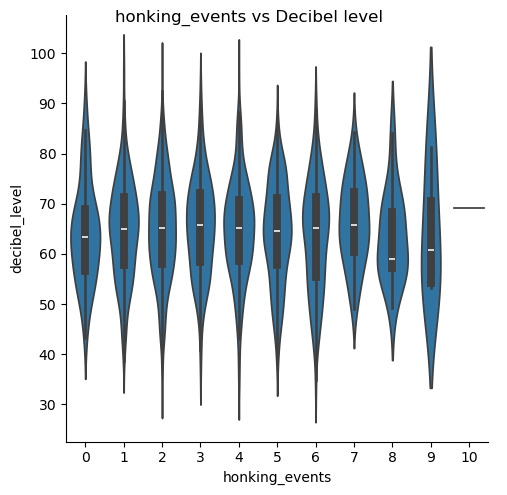

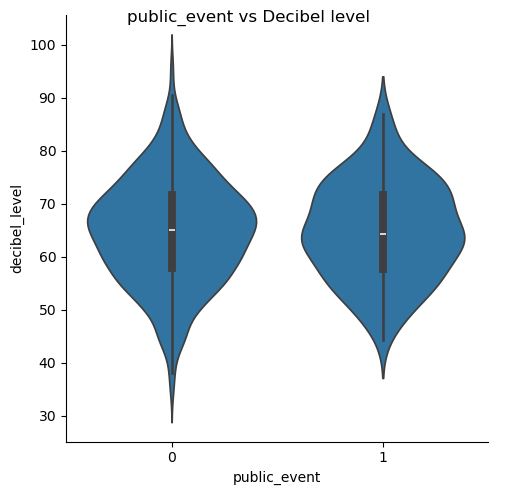

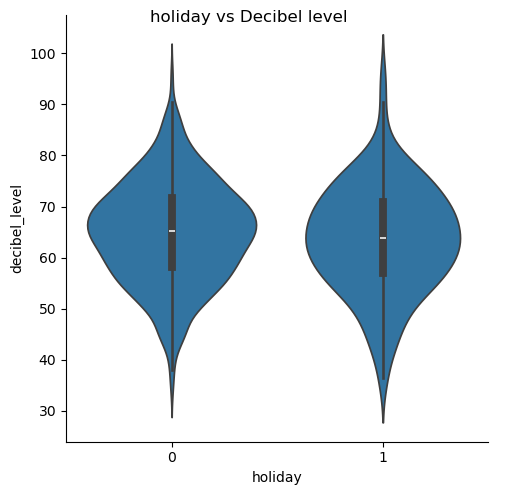

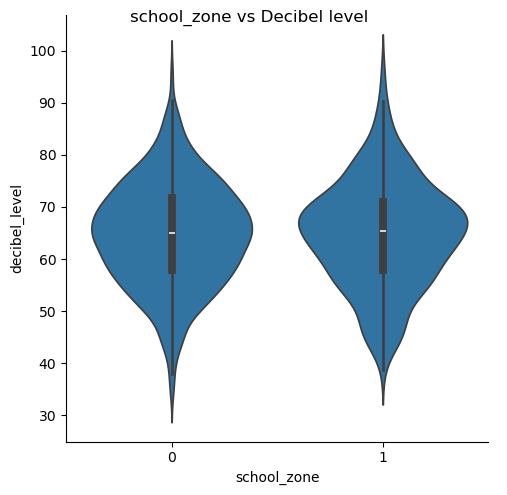

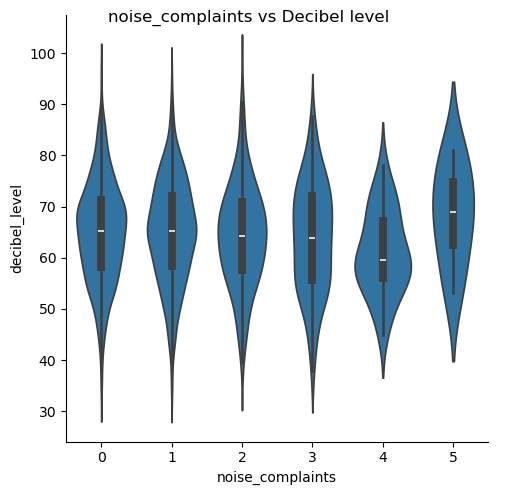

In [205]:
for col in cat_cols:
    g=sns.catplot(data=noise, x=col, y='decibel_level', kind='violin')
    g.fig.suptitle(f"{col} vs Decibel level")
    plt.show()


In [275]:
noise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  2000 non-null   int64         
 1   latitude            2000 non-null   float64       
 2   longitude           2000 non-null   float64       
 3   datetime            2000 non-null   datetime64[ns]
 4   decibel_level       2000 non-null   float64       
 5   hour                2000 non-null   int64         
 6   day_of_week         2000 non-null   category      
 7   is_weekend          2000 non-null   category      
 8   temperature_c       2000 non-null   float64       
 9   humidity_%          2000 non-null   float64       
 10  wind_speed_kmh      2000 non-null   float64       
 11  precipitation_mm    2000 non-null   float64       
 12  traffic_density     2000 non-null   category      
 13  near_airport        2000 non-null   category    

In [245]:
noise['year']=noise['datetime'].dt.year

In [249]:
noise['month']=noise['datetime'].dt.month

In [273]:
noise['day']=noise['datetime'].dt.day

In [279]:
noise['month'].value_counts()

month
7     190
5     182
12    176
3     173
9     172
4     170
1     169
8     164
10    158
11    153
2     150
6     143
Name: count, dtype: int64

In [271]:
print(noise['datetime'])

0      2023-04-01 18:50:00
1      2023-03-18 04:12:00
2      2023-12-03 05:43:00
3      2023-06-20 00:44:00
4      2023-12-28 12:06:00
               ...        
1995   2023-08-03 00:22:00
1996   2023-04-23 08:12:00
1997   2023-10-28 11:34:00
1998   2023-03-18 16:14:00
1999   2023-08-15 12:33:00
Name: datetime, Length: 2000, dtype: datetime64[ns]


In [377]:
from scipy.stats import pearsonr, spearmanr

In [ ]:
# 1. Hypothesis test
# ANOVA
# H0 - Mean noise level is the same for all days of week
# H1 - At least one day has a different mean noise level

In [373]:
#group decibel level by days:
noise_gr = noise[['day_of_week','decibel_level',]]
print(noise_gr.head())

  day_of_week  decibel_level
0           5      78.286408
1           5      68.131845
2           6      58.934966
3           1      69.559042
4           3      60.409097


In [385]:
noise_gr.loc[:,'day_of_week']=noise_gr['day_of_week'].astype('int')

In [387]:
corr, p_value=pearsonr(noise_gr['day_of_week'],noise_gr['decibel_level'])
print(f"Pearson correlation: {corr:.2f}, p-value: {p_value:.4f}")

Pearson correlation: -0.05, p-value: 0.0219


In [389]:
corr, p_value=spearmanr(noise_gr['day_of_week'],noise_gr['decibel_level'])
print(f"Spearman correlation: {corr:.2f}, p-value: {p_value:.4f}")

Spearman correlation: -0.05, p-value: 0.0384


In [ ]:
# 2. Hypothesis test
# ANOVA
# H0 - Mean noise level is the same for all categories of traffic density
# H1 - At least one categorie has a different mean noise level

In [391]:
corr, p_value=pearsonr(noise['traffic_density'],noise['decibel_level'])
print(f"Pearson correlation: {corr:.2f}, p-value: {p_value:.4f}")

Pearson correlation: 0.04, p-value: 0.0834
